In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch
from torch import nn, optim
from jcopdl.callback import set_config, Callback

device = ("cuda:0" if torch.cuda.is_available() else "cpu")
device

'cpu'

# Dataset dan Dataloader

In [3]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [4]:
bs = 64


transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.ToTensor()
])

train_set = datasets.ImageFolder("data/train/", transform=transform)
trainloader = DataLoader(train_set, batch_size=bs, shuffle=True, num_workers=4)

test_set = datasets.ImageFolder("data/test/", transform=transform)
testloader = DataLoader(test_set, batch_size=bs, shuffle=True, num_workers=4)



# Arsitektur dan Config


In [5]:
from jcopdl.layers import linear_block

In [6]:
class AutoEncoder(nn.Module):
    def __init__(self, z_size):
        super().__init__()
        
        self.encode = nn.Sequential(
            linear_block(784, 512, batch_norm=True),
            linear_block(512, 256, batch_norm=True),
            linear_block(256, z_size, activation="sigmoid")
        )
        
        self.decode = nn.Sequential(
            linear_block(z_size, 256, batch_norm=True),
            linear_block(256, 512, batch_norm=True),
            linear_block(512, 784, activation="sigmoid")
        )
        
    def forward(self, x):
        x = self.encode(x)
        x = self.decode(x)
        return x
        

In [7]:
config = set_config({
    "z_size": 32,
    "batch_size": bs
})

# Training preparation

In [8]:
model = AutoEncoder(config.z_size).to(device)
criterion = nn.BCELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)
callback = Callback(model, outdir="model/ae")

# Training

In [10]:
from tqdm.auto import tqdm

def loop_fn(mode, dataset, dataloader, model, criterion, optimizer, device):
    if mode == "train":
        model.train()
    elif mode == "test":
        model.eval()
    cost = 0
    for feature, _ in tqdm(dataloader, desc=mode.title()):
        feature = feature.view(-1, 784).to(device) # flatten menjadi 784
        
        output = model(feature)
        loss = criterion(output, feature)
        
        if mode == "train":
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
        cost += loss.item() * feature.shape[0]
    cost = cost / len(dataset)
    return cost



Epoch     1
Train_cost  = 0.3347 | Test_cost  = 0.2640 | 




Epoch     2
Train_cost  = 0.1830 | Test_cost  = 0.1737 | 




Epoch     3
Train_cost  = 0.1588 | Test_cost  = 0.1523 | 




Epoch     4
Train_cost  = 0.1446 | Test_cost  = 0.1406 | 




Epoch     5
Train_cost  = 0.1346 | Test_cost  = 0.1331 | 




Epoch     6
Train_cost  = 0.1279 | Test_cost  = 0.1277 | 




Epoch     7
Train_cost  = 0.1224 | Test_cost  = 0.1237 | 




Epoch     8
Train_cost  = 0.1175 | Test_cost  = 0.1198 | 




Epoch     9
Train_cost  = 0.1137 | Test_cost  = 0.1180 | 




Epoch    10
Train_cost  = 0.1103 | Test_cost  = 0.1143 | 




Epoch    11
Train_cost  = 0.1075 | Test_cost  = 0.1133 | 




Epoch    12
Train_cost  = 0.1046 | Test_cost  = 0.1110 | 




Epoch    13
Train_cost  = 0.1027 | Test_cost  = 0.1095 | 




Epoch    14
Train_cost  = 0.1003 | Test_cost  = 0.1082 | 




Epoch    15
Train_cost  = 0.0985 | Test_cost  = 0.1068 | 




Epoch    16
Train_cost  = 0.0969 | Test_cost  = 0.1064 | 




Epoch    17
Train_cost  = 0.0960 | Test_cost  = 0.1056 | 




Epoch    18
Train_cost  = 0.0949 | Test_cost  = 0.1049 | 




Epoch    19
Train_cost  = 0.0932 | Test_cost  = 0.1041 | 




Epoch    20
Train_cost  = 0.0919 | Test_cost  = 0.1035 | 


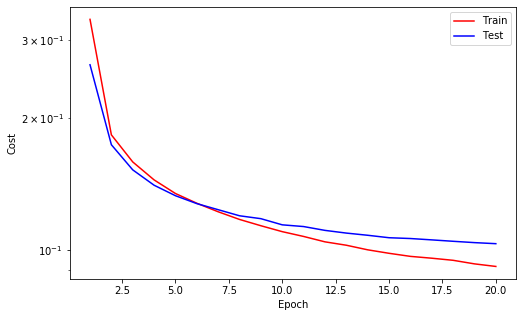



Epoch    21
Train_cost  = 0.0912 | Test_cost  = 0.1026 | 




Epoch    22
Train_cost  = 0.0903 | Test_cost  = 0.1026 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1026




Epoch    23
Train_cost  = 0.0891 | Test_cost  = 0.1014 | 




Epoch    24
Train_cost  = 0.0891 | Test_cost  = 0.1020 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1014




Epoch    25
Train_cost  = 0.0876 | Test_cost  = 0.1018 | 
==> EarlyStop patience =  2 | Best test_cost: 0.1014




Epoch    26
Train_cost  = 0.0872 | Test_cost  = 0.1013 | 




Epoch    27
Train_cost  = 0.0865 | Test_cost  = 0.1006 | 




Epoch    28
Train_cost  = 0.0858 | Test_cost  = 0.1003 | 




Epoch    29
Train_cost  = 0.0853 | Test_cost  = 0.0999 | 




Epoch    30
Train_cost  = 0.0850 | Test_cost  = 0.1000 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0999




Epoch    31
Train_cost  = 0.0840 | Test_cost  = 0.0991 | 




Epoch    32
Train_cost  = 0.0831 | Test_cost  = 0.0991 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0991




Epoch    33
Train_cost  = 0.0834 | Test_cost  = 0.0992 | 
==> EarlyStop patience =  2 | Best test_cost: 0.0991




Epoch    34
Train_cost  = 0.0831 | Test_cost  = 0.0989 | 




Epoch    35
Train_cost  = 0.0826 | Test_cost  = 0.0996 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0989




Epoch    36
Train_cost  = 0.0823 | Test_cost  = 0.0988 | 




Epoch    37
Train_cost  = 0.0818 | Test_cost  = 0.0994 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0988




Epoch    38
Train_cost  = 0.0817 | Test_cost  = 0.0997 | 
==> EarlyStop patience =  2 | Best test_cost: 0.0988




Epoch    39
Train_cost  = 0.0811 | Test_cost  = 0.0991 | 
==> EarlyStop patience =  3 | Best test_cost: 0.0988




Epoch    40
Train_cost  = 0.0810 | Test_cost  = 0.0989 | 


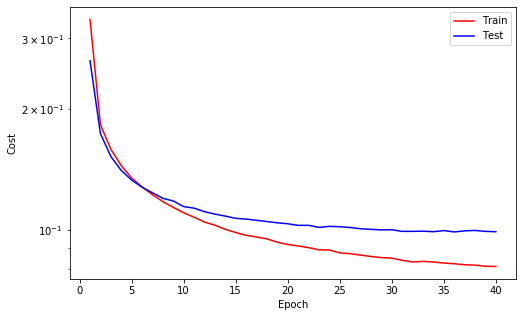

==> EarlyStop patience =  4 | Best test_cost: 0.0988




Epoch    41
Train_cost  = 0.0808 | Test_cost  = 0.0987 | 




Epoch    42
Train_cost  = 0.0799 | Test_cost  = 0.0990 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0987




Epoch    43
Train_cost  = 0.0801 | Test_cost  = 0.0989 | 
==> EarlyStop patience =  2 | Best test_cost: 0.0987




Epoch    44
Train_cost  = 0.0791 | Test_cost  = 0.0989 | 
==> EarlyStop patience =  3 | Best test_cost: 0.0987




Epoch    45
Train_cost  = 0.0798 | Test_cost  = 0.0985 | 




Epoch    46
Train_cost  = 0.0794 | Test_cost  = 0.0985 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0985




Epoch    47
Train_cost  = 0.0789 | Test_cost  = 0.0980 | 




Epoch    48
Train_cost  = 0.0780 | Test_cost  = 0.0984 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0980




Epoch    49
Train_cost  = 0.0786 | Test_cost  = 0.0983 | 
==> EarlyStop patience =  2 | Best test_cost: 0.0980




Epoch    50
Train_cost  = 0.0776 | Test_cost  = 0.0979 | 




Epoch    51
Train_cost  = 0.0773 | Test_cost  = 0.0981 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0979




Epoch    52
Train_cost  = 0.0771 | Test_cost  = 0.0983 | 
==> EarlyStop patience =  2 | Best test_cost: 0.0979




Epoch    53
Train_cost  = 0.0771 | Test_cost  = 0.0980 | 
==> EarlyStop patience =  3 | Best test_cost: 0.0979




Epoch    54
Train_cost  = 0.0772 | Test_cost  = 0.0976 | 




Epoch    55
Train_cost  = 0.0767 | Test_cost  = 0.0979 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0976




Epoch    56
Train_cost  = 0.0762 | Test_cost  = 0.0981 | 
==> EarlyStop patience =  2 | Best test_cost: 0.0976




Epoch    57
Train_cost  = 0.0765 | Test_cost  = 0.0983 | 
==> EarlyStop patience =  3 | Best test_cost: 0.0976




Epoch    58
Train_cost  = 0.0765 | Test_cost  = 0.0981 | 
==> EarlyStop patience =  4 | Best test_cost: 0.0976




Epoch    59
Train_cost  = 0.0763 | Test_cost  = 0.0982 | 
==> EarlyStop patience =  5 | Best test_cost: 0.0976
==> Execute Early Stopping at epoch: 59 | Best test_cost: 0.0976
==> Best model is saved at model/ae


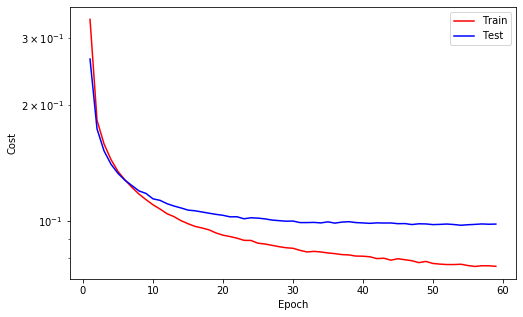

In [11]:
while True:
    train_cost = loop_fn("train", train_set, trainloader, model, criterion, optimizer, device)
    with torch.no_grad():
        test_cost = loop_fn("test", test_set, testloader, model, criterion, optimizer, device)
        
    # logging
    callback.log(train_cost, test_cost)
    
    # checkpoint
    callback.save_checkpoint()
    
    # runtime plotting
    callback.cost_runtime_plotting()
    
    # early stopping
    if callback.early_stopping(model, monitor="test_cost"):
        callback.plot_cost()
        break
    
        

# sanity check


- feature, target = next(iter(testloader)) # tarik 1 minibatch dr testloader
- feature = feature.view(-1, 784).to(device) # pindah gpu dan flatten




In [12]:
feature, target = next(iter(testloader))
feature = feature.view(-1, 784).to(device)

In [13]:
with torch.no_grad():
    model.eval()
    enc = model.encode(feature) # feedforward
    dec = model.decode(enc) # ssuatu yg sudah encoded ini kita decode

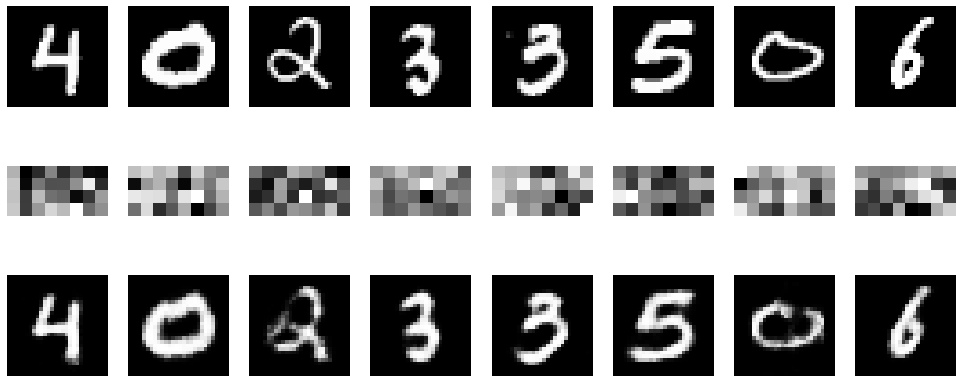

In [14]:
fig, ax = plt.subplots(3, 8, figsize=(17, 7))
for i in range(8):
    
    # feature aslinya
    ax[0, i].imshow(feature[i].view(28, 28).cpu(), cmap="gray")
    ax[0, i].axis('off')
    
    # encodednya / latent spacenya
    ax[1, i].imshow(enc[i].view(4, 8).cpu(), cmap="gray")
    ax[1, i].axis('off')
    
    # hasil decodednya
    ax[2, i].imshow(dec[i].view(28, 28).cpu(), cmap="gray")
    ax[2, i].axis('off')
    

# playground

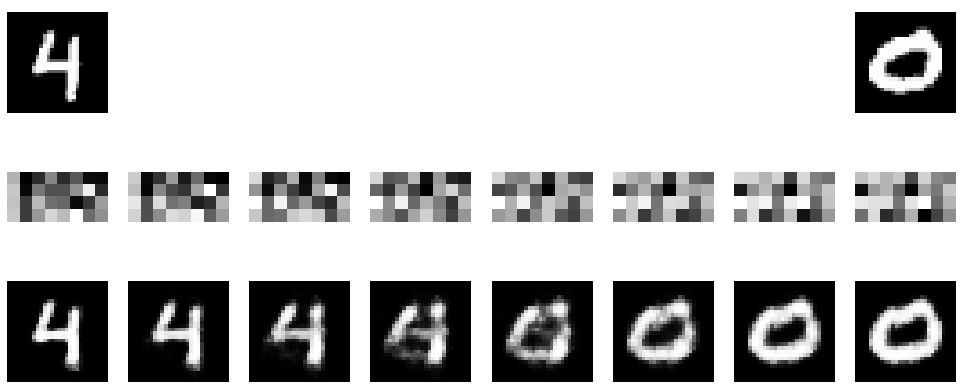

In [24]:
with torch.no_grad():
    model.eval()
    enc = model.encode(feature)
    
    code1, code2 = enc[0], enc[1]
    codes = [(1-i)*code1 + i*code2 for i in np.linspace(0, 1, 8)]
    enc = torch.stack(codes)
    
    dec = model.decode(enc)
    
fig, ax = plt.subplots(3, 8, figsize=(17, 7))

ax[0, 0].imshow(feature[0].view(28, 28).cpu(), cmap="gray")
ax[0, 7].imshow(feature[1].view(28, 28).cpu(), cmap="gray")

for i in range(8):
    ax[0, i].axis("off")
    
    ax[1, i].imshow(enc[i].view(4, 8).cpu(), cmap="gray")
    ax[1, i].axis("off")
    
    ax[2, i].imshow(dec[i].view(28, 28).cpu(), cmap="gray")
    ax[2, i].axis("off")

    

- artinya kita bisa simpan informasi apa saja di latent space

# Denoising auto encoder


In [25]:
def add_noise(images, noise_factor=0.5):
    images = torch.clone(images)
    images += noise_factor * torch.rand_like(images)
    images = images.clamp(0., 1.)
    return images

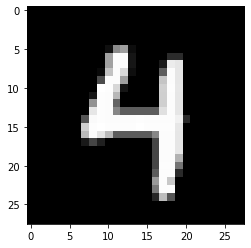

In [27]:
plt.imshow(feature[0].view(28, 28).cpu(), cmap="gray");

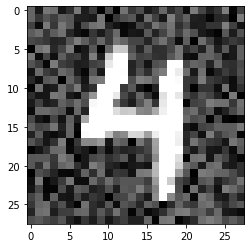

In [28]:
plt.imshow(add_noise(feature[0]).view(28, 28).cpu(), cmap="gray");

In [37]:
model = AutoEncoder(config.z_size).to(device)
criterion = nn.BCELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)
callback = Callback(model, outdir="model/dae")

# Training

In [39]:
from tqdm.auto import tqdm

def loop_fn(mode, dataset, dataloader, model, criterion, optimizer, device):
    if mode == "train":
        model.train()
    elif mode == "test":
        model.eval()
    cost = 0
    for feature, _ in tqdm(dataloader, desc=mode.title()):
        feature = feature.view(-1, 784).to(device) # flatten menjadi 784
        
        output = model(add_noise(feature))
        loss = criterion(output, feature)
        
        if mode == "train":
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
        cost += loss.item() * feature.shape[0]
    cost = cost / len(dataset)
    return cost



Epoch     1
Train_cost  = 0.3393 | Test_cost  = 0.2667 | 




Epoch     2
Train_cost  = 0.1871 | Test_cost  = 0.1779 | 




Epoch     3
Train_cost  = 0.1631 | Test_cost  = 0.1564 | 




Epoch     4
Train_cost  = 0.1501 | Test_cost  = 0.1459 | 




Epoch     5
Train_cost  = 0.1404 | Test_cost  = 0.1378 | 




Epoch     6
Train_cost  = 0.1330 | Test_cost  = 0.1328 | 




Epoch     7
Train_cost  = 0.1276 | Test_cost  = 0.1287 | 




Epoch     8
Train_cost  = 0.1230 | Test_cost  = 0.1257 | 




Epoch     9
Train_cost  = 0.1200 | Test_cost  = 0.1240 | 




Epoch    10
Train_cost  = 0.1165 | Test_cost  = 0.1210 | 




Epoch    11
Train_cost  = 0.1135 | Test_cost  = 0.1185 | 




Epoch    12
Train_cost  = 0.1108 | Test_cost  = 0.1174 | 




Epoch    13
Train_cost  = 0.1089 | Test_cost  = 0.1157 | 




Epoch    14
Train_cost  = 0.1072 | Test_cost  = 0.1139 | 




Epoch    15
Train_cost  = 0.1059 | Test_cost  = 0.1132 | 




Epoch    16
Train_cost  = 0.1041 | Test_cost  = 0.1120 | 




Epoch    17
Train_cost  = 0.1023 | Test_cost  = 0.1113 | 




Epoch    18
Train_cost  = 0.1014 | Test_cost  = 0.1100 | 




Epoch    19
Train_cost  = 0.1011 | Test_cost  = 0.1097 | 




Epoch    20
Train_cost  = 0.0993 | Test_cost  = 0.1091 | 


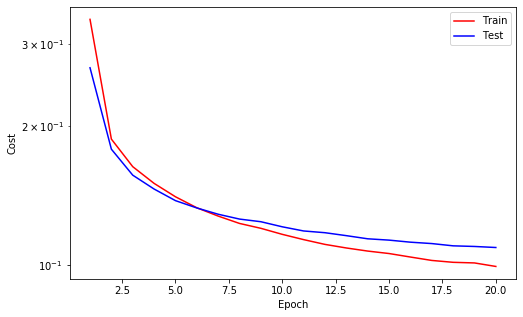



Epoch    21
Train_cost  = 0.0976 | Test_cost  = 0.1092 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1091




Epoch    22
Train_cost  = 0.0967 | Test_cost  = 0.1081 | 




Epoch    23
Train_cost  = 0.0962 | Test_cost  = 0.1075 | 




Epoch    24
Train_cost  = 0.0949 | Test_cost  = 0.1066 | 




Epoch    25
Train_cost  = 0.0941 | Test_cost  = 0.1063 | 




Epoch    26
Train_cost  = 0.0941 | Test_cost  = 0.1067 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1063




Epoch    27
Train_cost  = 0.0928 | Test_cost  = 0.1056 | 




Epoch    28
Train_cost  = 0.0929 | Test_cost  = 0.1059 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1056




Epoch    29
Train_cost  = 0.0913 | Test_cost  = 0.1049 | 




Epoch    30
Train_cost  = 0.0908 | Test_cost  = 0.1045 | 




Epoch    31
Train_cost  = 0.0906 | Test_cost  = 0.1046 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1045




Epoch    32
Train_cost  = 0.0903 | Test_cost  = 0.1054 | 
==> EarlyStop patience =  2 | Best test_cost: 0.1045




Epoch    33
Train_cost  = 0.0896 | Test_cost  = 0.1046 | 
==> EarlyStop patience =  3 | Best test_cost: 0.1045




Epoch    34
Train_cost  = 0.0894 | Test_cost  = 0.1043 | 




Epoch    35
Train_cost  = 0.0888 | Test_cost  = 0.1040 | 




Epoch    36
Train_cost  = 0.0888 | Test_cost  = 0.1041 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1040




Epoch    37
Train_cost  = 0.0883 | Test_cost  = 0.1043 | 
==> EarlyStop patience =  2 | Best test_cost: 0.1040




Epoch    38
Train_cost  = 0.0871 | Test_cost  = 0.1034 | 




Epoch    39
Train_cost  = 0.0874 | Test_cost  = 0.1037 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1034




Epoch    40
Train_cost  = 0.0872 | Test_cost  = 0.1040 | 


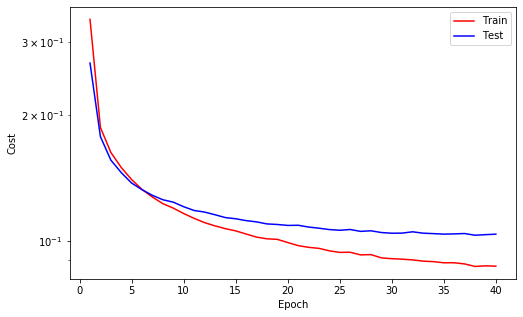

==> EarlyStop patience =  2 | Best test_cost: 0.1034




Epoch    41
Train_cost  = 0.0865 | Test_cost  = 0.1035 | 
==> EarlyStop patience =  3 | Best test_cost: 0.1034




Epoch    42
Train_cost  = 0.0860 | Test_cost  = 0.1034 | 
==> EarlyStop patience =  4 | Best test_cost: 0.1034




Epoch    43
Train_cost  = 0.0857 | Test_cost  = 0.1026 | 




Epoch    44
Train_cost  = 0.0850 | Test_cost  = 0.1036 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1026




Epoch    45
Train_cost  = 0.0846 | Test_cost  = 0.1029 | 
==> EarlyStop patience =  2 | Best test_cost: 0.1026




Epoch    46
Train_cost  = 0.0850 | Test_cost  = 0.1029 | 
==> EarlyStop patience =  3 | Best test_cost: 0.1026




Epoch    47
Train_cost  = 0.0842 | Test_cost  = 0.1029 | 
==> EarlyStop patience =  4 | Best test_cost: 0.1026


In [ ]:
while True:
    train_cost = loop_fn("train", train_set, trainloader, model, criterion, optimizer, device)
    with torch.no_grad():
        test_cost = loop_fn("test", test_set, testloader, model, criterion, optimizer, device)
        
    # logging
    callback.log(train_cost, test_cost)
    
    # checkpoint
    callback.save_checkpoint()
    
    # runtime plotting
    callback.cost_runtime_plotting()
    
    # early stopping
    if callback.early_stopping(model, monitor="test_cost"):
        callback.plot_cost()
        break
    
        

In [ ]:
feature, target = next(iter(testloader))
feature = add_noise(feature).view(-1, 784).to(device)

In [ ]:
with torch.no_grad():
    model.eval()
    enc = model.encode(feature)
    dec = model.decode(enc)

In [ ]:
fig, ax = plt.subplots(3, 8, figsize=(17, 7))
for i in range(8):
    
    # feature aslinya
    ax[0, i].imshow(feature[i].view(28, 28).cpu(), cmap="gray")
    ax[0, i].axis('off')
    
    # encodednya / latent spacenya
    ax[1, i].imshow(enc[i].view(4, 8).cpu(), cmap="gray")
    ax[1, i].axis('off')
    
    # hasil decodednya
    ax[2, i].imshow(dec[i].view(28, 28).cpu(), cmap="gray")
    ax[2, i].axis('off')
    